<a href="https://colab.research.google.com/github/irajamuller/quantum_computing/blob/main/Circuito_Qu%C3%A2ntico_2_qubits%2C_Operador_Densidade_e_Esfera_de_Bloch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit --quiet
!pip install qiskit-aer --quiet
!pip install pylatexenc --quiet
!pip install qutip --quiet

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector, DensityMatrix, purity, partial_trace
from qutip import Bloch

import numpy as np

# Circuito Quântico de 2 qubits

In [ ]:
# Portas quânticas (operações unitárias)
I = np.array([ [1, 0], [0, 1] ])
X = np.array([ [0, 1], [1, 0] ])
H = np.array([ [1, 1], [1, -1] ]) * 1/np.sqrt(2)

In [ ]:
# Estado 2 qubits em |00>
ket0 = np.array([ [1], [0] ])
ket1 = np.array([ [0], [1] ])
psi = np.kron(ket0, ket0)
array_to_latex(psi)

<IPython.core.display.Latex object>

In [ ]:
# Aplicando porta X no primeiro qubit e identidade no segundo qubit
psi1 = np.kron(X, I) @ psi
array_to_latex(psi1)

<IPython.core.display.Latex object>

In [ ]:
# Aplicando porta X no primeiro qubit e hadamard no segundo qubit
psi2 = np.kron(X, H) @ psi1
array_to_latex(psi2)

<IPython.core.display.Latex object>

# Porta CNOT

In [ ]:
CNOT = np.kron(ket0 @ ket0.conj().T, I)
CNOT = CNOT + np.kron(ket1 @ ket1.conj().T, X)
array_to_latex(CNOT)

<IPython.core.display.Latex object>

In [ ]:
psi10 = np.kron(ket1, ket0)
array_to_latex(psi10)

<IPython.core.display.Latex object>

In [ ]:
# Aplicando a CNOT em dois qubits |10>
array_to_latex(CNOT @ psi10)

<IPython.core.display.Latex object>

In [ ]:
# Aplicando a CNOT em dois qubits |11>
psi11 = np.kron(ket1, ket1)
array_to_latex(CNOT @ psi11)

<IPython.core.display.Latex object>

# Medição

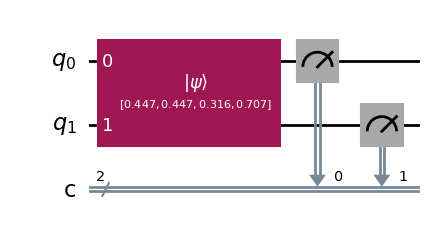

In [ ]:
qc = QuantumCircuit(2, 2)
qc.initialize([ np.sqrt(0.2), np.sqrt(0.2), np.sqrt(0.1), np.sqrt(0.5) ], [0, 1])
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

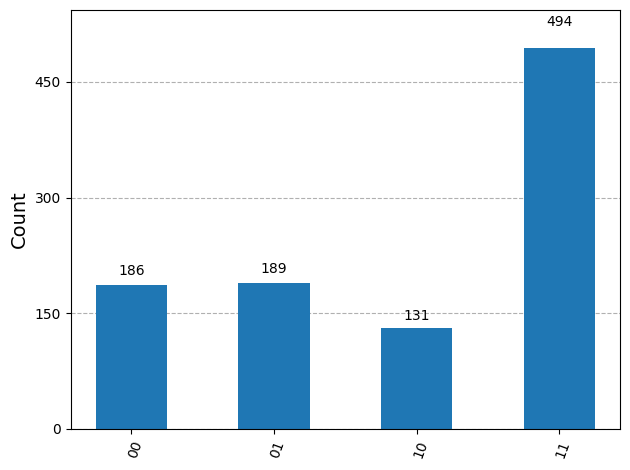

In [ ]:
qc_t = transpile(qc)
backend = AerSimulator()

result = backend.run(qc_t, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

# Operador Densidade(ρ)

In [ ]:
# Estado Puro
psi = np.array([ [1/np.sqrt(2)], [1/np.sqrt(2) * 1j] ])
array_to_latex(psi)

<IPython.core.display.Latex object>

In [ ]:
rho = psi @ psi.T.conj()
array_to_latex(rho)

<IPython.core.display.Latex object>

In [ ]:
# Tr(p)
array_to_latex(partial_trace(rho, [0]))

<IPython.core.display.Latex object>

In [ ]:
# Tr(p^2)
print(np.round(purity(rho), 1))

(1+0j)


In [ ]:
# Estado Misto
psi1 = np.array([ [1/np.sqrt(2)], [1/np.sqrt(2) * 1j] ])
psi2 = np.array([ [1/np.sqrt(2)], [1/np.sqrt(2) * -1j] ])
array_to_latex(psi1)

<IPython.core.display.Latex object>

In [ ]:
rho = 0.5 * psi1 @ psi1.conj().T + 0.5 * psi2 @ psi2.conj().T
array_to_latex(rho)

<IPython.core.display.Latex object>

In [ ]:
# Tr{p}
array_to_latex(partial_trace(rho, [0]))

<IPython.core.display.Latex object>

In [ ]:
# Tr{p^2}
print(np.round(purity(rho), 1))

(0.5+0j)


# Esfera de Bloch

In [1]:
# Criando objeto do tipo esfera
b = Bloch()

alpha = 1 + 0j
beta = 0 + 0j

# Cuidado com a multiplicação por 2
theta = np.arctan(np.abs(beta) / np.abs(alpha))
phi = 0

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Definindo ponto
b.add_vectors([x, y, z])

# Adicionando pontos
b.add_vectors([x, y, z])

# Visualizando esfera
b.show()

NameError: name 'Bloch' is not defined